In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv("gp-training-set.csv", header=None)

# Separate inputs (x1 to x9) and labels (l)
x = data.iloc[:, :-1].values  # Rows 1 to 9 are the inputs
y = data.iloc[:, -1].values   # Row 10 is the label (l)

# Define GA parameters
population_size = 100  # Number of individuals in population
num_generations = 50  # Number of generations
mutation_rate = 0.1    # Probability of mutation
num_parents_mating = 5 # Number of parents selected for mating
num_weights = X.shape[1]  # Number of input features (9)

In [38]:
# Generate initial population of weights (w1 to w9) and threshold (theta)
def initialize_population(pop_size, num_weights):
    return np.random.uniform(low=-1.0, high=1.0, size=(pop_size, num_weights + 1))

# Perceptron model: calculate predictions based on weights and threshold
def predict(X, weights, threshold):
    linear_output = np.dot(X, weights) - threshold
    return np.where(linear_output > 0, 1, 0)

# Fitness function: calculate accuracy of the perceptron
def fitness(weights_and_threshold):
    weights = weights_and_threshold[:-1]
    threshold = weights_and_threshold[-1]
    predictions = predict(X, weights, threshold)
    accuracy = np.sum(predictions == y) / len(y)
    return accuracy

# Select the best individuals for mating
def select_mating_pool(population, fitness_scores, num_parents):
    parents = np.empty((num_parents, population.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.argmax(fitness_scores)
        parents[parent_num, :] = population[max_fitness_idx, :]
        fitness_scores[max_fitness_idx] = -99999999  # So it won't be selected again
    return parents

# Crossover: create new offspring by combining two parents
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)  # Crossover at the midpoint
    for k in range(offspring_size[0]):
        # Index of the first parent
        parent1_idx = k % parents.shape[0]
        # Index of the second parent
        parent2_idx = (k + 1) % parents.shape[0]
        # First half from parent1, second half from parent2
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

# Mutation: randomly change some weights and threshold
def mutation(offspring_crossover, mutation_rate=0.1):
    for idx in range(offspring_crossover.shape[0]):
        for gene_idx in range(offspring_crossover.shape[1]):
            # Apply mutation based on mutation rate
            if np.random.rand() < mutation_rate:
                random_value = np.random.uniform(-1.0, 1.0)
                offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
    return offspring_crossover

# Main Genetic Algorithm Loop
population = initialize_population(population_size, num_weights)

# Keep track of fitness scores over generations for plotting
fitness_history = []

for generation in range(num_generations):
    # Calculate fitness for each individual in the population
    fitness_scores = np.array([fitness(individual) for individual in population])

    # Early stopping if the best fitness score reaches 1.0
    if np.max(fitness_scores) >= 1.0:
        print(f"Early stopping: Reached fitness of 1.0 at generation {generation + 1}")
        break
    
    # Store the best fitness score of the generation for plotting
    fitness_history.append(np.max(fitness_scores))
    
    # Select parents based on fitness
    parents = select_mating_pool(population, fitness_scores, num_parents_mating)
    
    # Generate next generation using crossover
    offspring_crossover = crossover(parents, offspring_size=(population_size - parents.shape[0], num_weights + 1))
    
    # Apply mutation
    offspring_mutation = mutation(offspring_crossover, mutation_rate)
    
    # Create new population by combining parents and offspring
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation
    
    # Print best result in the generation
    best_fitness = np.max(fitness_scores)
    print(f"Generation {generation+1}, Best Fitness: {best_fitness:.4f}")

Generation 1, Best Fitness: 0.6200
Generation 2, Best Fitness: 0.7400
Generation 3, Best Fitness: 0.8200
Generation 4, Best Fitness: 0.8300
Generation 5, Best Fitness: 0.8600
Generation 6, Best Fitness: 0.8800
Generation 7, Best Fitness: 0.9000
Generation 8, Best Fitness: 0.9000
Generation 9, Best Fitness: 0.9000
Generation 10, Best Fitness: 0.9000
Generation 11, Best Fitness: 0.9000
Generation 12, Best Fitness: 0.9000
Generation 13, Best Fitness: 0.9000
Generation 14, Best Fitness: 0.9000
Generation 15, Best Fitness: 0.9000
Generation 16, Best Fitness: 0.9000
Generation 17, Best Fitness: 0.9000
Generation 18, Best Fitness: 0.9000
Generation 19, Best Fitness: 0.9000
Generation 20, Best Fitness: 0.9000
Generation 21, Best Fitness: 0.9000
Generation 22, Best Fitness: 0.9000
Generation 23, Best Fitness: 0.9000
Generation 24, Best Fitness: 0.9000
Generation 25, Best Fitness: 0.9000
Generation 26, Best Fitness: 0.9000
Generation 27, Best Fitness: 0.9000
Generation 28, Best Fitness: 0.9000
G

In [39]:
# After the final generation, retrieve the best solution
fitness_scores = np.array([fitness(individual) for individual in population])
best_solution_idx = np.argmax(fitness_scores)
best_solution = population[best_solution_idx]

# Extract weights and threshold from the best solution
best_weights = best_solution[:-1]
best_threshold = best_solution[-1]

# Display the best weights and threshold as a list
print("\nBest Weights and Threshold:")
print(f"Weights (w1 to w9): {list(best_weights)}")
print(f"Threshold (θ): {best_threshold}")


Best Weights and Threshold:
Weights (w1 to w9): [0.3561407218106871, -0.8404465286543144, -1.224263787987804, 0.43940886969204374, -0.4397450041682469, -1.0229340499818895, 0.763647488917591, -0.1582725016069777, 0.30796838620363864]
Threshold (θ): -0.7962229489959038


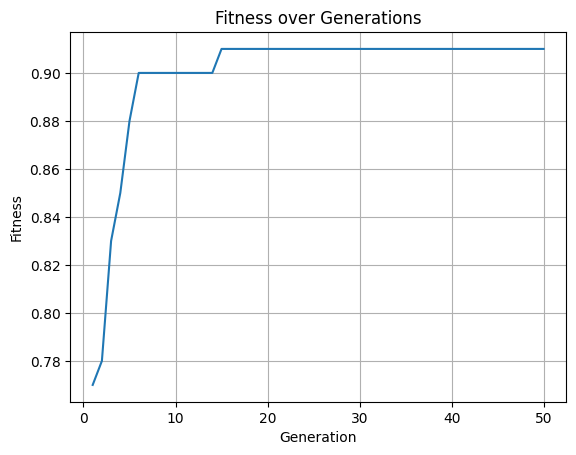

In [40]:
# Plot fitness over generations using Matplotlib
plt.plot(range(1, num_generations+1), fitness_history)
plt.title("Fitness over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()